# 1. Mô tả dữ liệu

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from dateutil import parser
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

with open(r'C:\Users\Dell\OneDrive\Documents\Data Mining 252\car_prices.csv') as f:
    df = pd.read_csv(f, dtype={'age': np.float64, 'sibsp': np.int64, 'parch': np.int64})
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


# 2.Làm sạch dữ liệu

## 2.1 Nhận diện và xử lý dữ liệu bị nhiễu

In [2]:
numeric_columns = df.select_dtypes(include=[np.number])
column_stats = pd.DataFrame({
    'Count': numeric_columns.count(),
    'Average': numeric_columns.mean(),
    'Max': numeric_columns.max()
})

print(column_stats)

               Count       Average       Max
year          558837   2010.038927    2015.0
condition     547017     30.672365      49.0
odometer      558743  68320.017767  999999.0
mmr           558799  13769.377495  182000.0
sellingprice  558825  13611.358810  230000.0


In [3]:
non_numeric_columns = df.select_dtypes(exclude=[np.number])

column_stats = []

for column in non_numeric_columns:
    unique_values = df[column].unique()
    total_unique = len(unique_values)
    value_counts = df[column].value_counts()
    highest_count = value_counts.max()
    value_with_highest_count = value_counts.idxmax()
    lowest_count = value_counts.min()
    value_with_lowest_count = value_counts.idxmin()
    
    column_stats.append({'Column': column,
                         'Total Unique': total_unique,
                         'Highest Count': highest_count,
                         'Value with Highest Count': value_with_highest_count,
                         'Lowest Count': lowest_count,
                         'Value with Lowest Count': value_with_lowest_count})

column_stats = pd.DataFrame(column_stats)

print(column_stats)

          Column  Total Unique  Highest Count  \
0           make            97          93554   
1          model           974          19349   
2           trim          1964          55817   
3           body            88         199437   
4   transmission             5         475915   
5            vin        550298             22   
6          state            64          82945   
7          color            47         110970   
8       interior            18         244329   
9         seller         14263          19693   
10      saledate          3767           5334   

                   Value with Highest Count  Lowest Count  \
0                                      Ford             1   
1                                    Altima             1   
2                                      Base             1   
3                                     Sedan             1   
4                                 automatic            11   
5                                 automatic  

In [4]:
q1=df.year.quantile(0.25)
q3=df.year.quantile(0.75)
q1,q3
IQR=q3-q1
lower_year=q1-IQR*1.5
upper_year=q3+IQR*1.5
print("IQR:", IQR)
print("q1:", q1)
print("q3:", q3)
print("Lower limit:", lower_year)
print("Upper limit:", upper_year)


IQR: 6.0
q1: 2007.0
q3: 2013.0
Lower limit: 1998.0
Upper limit: 2022.0


In [5]:
df[ (df.year<lower_year) | (df.year>upper_year)]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
5147,1995,Mercedes-Benz,S-Class,S320 LWB,Sedan,automatic,wdbga33e6sa240718,ca,NaN,172358.0,silver,â€”,ocean auto sales,1125.0,1700.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
5148,1996,Toyota,4Runner,SR5,SUV,automatic,jt3gn86r1t0018360,ca,2.0,227353.0,silver,tan,aaero sweet company,1600.0,1300.0,Wed Dec 17 2014 11:30:00 GMT-0800 (PST)
5150,1995,Mercedes-Benz,E-Class,E320,Sedan,automatic,wdbea32e3sc272295,ca,2.0,241685.0,black,black,newport auto sports,900.0,400.0,Wed Dec 31 2014 11:30:00 GMT-0800 (PST)
5151,1997,Ford,F-150,XLT,Extended Cab,NaN,1ftdx1760vna68581,ca,NaN,423691.0,white,â€”,ana car sale,575.0,500.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
5152,1997,Subaru,Legacy,Outback Limited,Wagon,automatic,4s3bg685xv7646670,ca,2.0,193138.0,blue,gray,charitable auto resource,1250.0,400.0,Tue Dec 23 2014 13:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557327,1994,Cadillac,Seville,Base,sedan,automatic,1g6ks52y6ru826119,fl,2.0,147219.0,blue,â€”,ed morse auto plaza,750.0,900.0,Thu Jun 18 2015 08:30:00 GMT-0700 (PDT)
557328,1994,Honda,Civic,LX,sedan,automatic,1hgeg8650rl003433,fl,2.0,208218.0,blue,gray,coggin honda of ft pierce,575.0,350.0,Thu Jun 18 2015 06:00:00 GMT-0700 (PDT)
557329,1995,Chevrolet,Camaro,Base,hatchback,automatic,2g1fp22s3s2209758,tx,3.0,118442.0,black,gray,autonation ford south fort worth,1225.0,1400.0,Thu Jun 18 2015 04:00:00 GMT-0700 (PDT)
557863,1996,NaN,NaN,NaN,NaN,automatic,1b4gp54lxtb344615,fl,3.0,107504.0,green,gray,brandon auto mall fiat,650.0,1400.0,Thu Jun 18 2015 08:30:00 GMT-0700 (PDT)


In [6]:
df_updated= df[ (df.year>=lower_year) & (df.year<=upper_year)]
df_updated

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [7]:
q1=df_updated.condition.quantile(0.25)
q3=df_updated.condition.quantile(0.75)
IQR=q3-q1
lower_cond=q1-IQR*1.5
upper_cond=q3+IQR*1.5
print("IQR:", IQR)
print("q1:", q1)
print("q3:", q3)
print("Lower limit:", lower_cond)
print("Upper limit:", upper_cond)

IQR: 18.0
q1: 24.0
q3: 42.0
Lower limit: -3.0
Upper limit: 69.0


In [8]:
df_updated[ (df_updated.condition<lower_cond) | (df_updated.condition>upper_cond)]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate


In [9]:
q1=df_updated.odometer.quantile(0.25)
q3=df_updated.odometer.quantile(0.75)
IQR=q3-q1
lower_odo=q1-IQR*1.5
upper_odo=q3+IQR*1.5
print("IQR:", IQR)
print("q1:", q1)
print("q3:", q3)
print("Lower limit:", lower_odo)
print("Upper limit:", upper_odo)

IQR: 69967.0
q1: 28242.0
q3: 98209.0
Lower limit: -76708.5
Upper limit: 203159.5


In [10]:
df_updated[(df_updated.condition<lower_cond) | (df_updated.odometer>upper_odo )]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
275,2013,Hyundai,Elantra Coupe,GS,Elantra Coupe,automatic,kmhdh6ae8du017422,ca,1.0,999999.0,blue,gray,hyundai motor finance,8025.0,2500.0,Tue Jan 27 2015 04:00:00 GMT-0800 (PST)
1666,2012,Nissan,Frontier,S,King Cab,automatic,1n6bd0ct2cc446833,ca,2.0,227606.0,white,gray,o'reilly auto parts,5000.0,5100.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
2038,2011,Chevrolet,HHR,Panel LS,Wagon,automatic,3gcaaafw8bs555471,ca,NaN,236928.0,white,â€”,north star auto inc,2625.0,2350.0,Wed Dec 17 2014 11:30:00 GMT-0800 (PST)
2470,2011,Toyota,Corolla,Base,Sedan,automatic,jtdbu4ee4bj094907,ca,1.0,291087.0,white,gray,ge fleet services for itself/servicer,7650.0,3600.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
2682,2010,ford,e150,cargo commercial,NaN,automatic,1ftne1ew2adb02761,ca,33.0,237880.0,white,gray,ford motor credit company llc,5150.0,6800.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558468,2002,Chevrolet,Tahoe,LS,suv,automatic,1gnek13z52r240327,fl,27.0,209889.0,black,gray,zimmerman auto brokers inc,1875.0,2400.0,Fri Jun 19 2015 02:30:00 GMT-0700 (PDT)
558470,2002,Honda,Odyssey,LX,minivan,automatic,2hkrl18512h555288,ma,2.0,215038.0,red,gray,boch new to you superstore,975.0,300.0,Thu Jun 18 2015 11:30:00 GMT-0700 (PDT)
558717,2000,Ford,Explorer,XLT,suv,automatic,1fmzu73e7yza37772,tx,27.0,220815.0,blue,gray,classic chevrolet inc,475.0,600.0,Fri Jun 19 2015 04:00:00 GMT-0700 (PDT)
558768,2011,Ford,Fusion Hybrid,Base,sedan,automatic,3fadp0l38br272114,fl,26.0,204835.0,blue,beige,firkins chrysler jeep dodge,7750.0,7400.0,Tue Jul 07 2015 12:00:00 GMT-0700 (PDT)


In [11]:
df_updated=df_updated[(df_updated.condition>=lower_cond) & (df_updated.odometer<=upper_odo )]
df_updated

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [12]:
q1=df_updated.mmr.quantile(0.25)
q3=df_updated.mmr.quantile(0.75)
IQR=q3-q1
lower_mmr=q1-IQR*1.5
upper_mmr=q3+IQR*1.5
print("IQR:", IQR)
print("q1:", q1)
print("q3:", q3)
print("Lower limit:", lower_mmr)
print("Upper limit:", upper_mmr)

IQR: 10750.0
q1: 7850.0
q3: 18600.0
Lower limit: -8275.0
Upper limit: 34725.0


In [13]:
df_updated[(df_updated.mmr<lower_mmr) | (df_updated.mmr>upper_mmr )]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
10,2014,Audi,A6,3.0T Prestige quattro,Sedan,automatic,wauhgafc0en062916,ca,48.0,14414.0,black,black,desert auto trade,47300.0,49750.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
17,2014,Audi,Q5,2.0T Premium Plus quattro,SUV,automatic,wa1lfafpxea085074,ca,49.0,7983.0,white,black,audi north scottsdale,37100.0,40000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
19,2014,BMW,6 Series,650i,Convertible,automatic,wbayp9c53ed169260,ca,34.0,8819.0,black,black,the hertz corporation,68000.0,67200.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558777,2012,Maserati,Quattroporte,S,sedan,automatic,zam39jka1c0060738,ga,39.0,21923.0,blue,â€”,maserati north america inc,53300.0,40250.0,Wed Jun 24 2015 03:00:00 GMT-0700 (PDT)
558807,2014,Mercedes-Benz,E-Class,E63 AMG 4MATIC,Sedan,automatic,wddhf9cb9ea917688,ca,45.0,17518.0,black,black,the hertz corporation,64000.0,69500.0,Tue Jul 07 2015 09:30:00 GMT-0700 (PDT)
558816,2013,Mercedes-Benz,G-Class,G63 AMG,suv,automatic,wdcyc7df4dx207385,fl,5.0,26799.0,black,black,fields bmw,104000.0,105000.0,Tue Jul 07 2015 06:00:00 GMT-0700 (PDT)
558824,2013,Audi,S5,Premium Plus quattro,convertible,automatic,waucgafh6dn005382,fl,5.0,20158.0,silver,black,prestige audi,43900.0,42000.0,Thu Jul 09 2015 06:00:00 GMT-0700 (PDT)


In [14]:
df_updated=df_updated[(df_updated.mmr>=lower_mmr) & (df_updated.mmr<=upper_mmr )]
df_updated

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [15]:
q1=df_updated.sellingprice.quantile(0.25)
q3=df_updated.sellingprice.quantile(0.75)
IQR=q3-q1
lower_sell=q1-IQR*1.5
upper_sell=q3+IQR*1.5
print("IQR:", IQR)
print("q1:", q1)
print("q3:", q3)
print("Lower limit:", lower_sell)
print("Upper limit:", upper_sell)

IQR: 10400.0
q1: 7400.0
q3: 17800.0
Lower limit: -8200.0
Upper limit: 33400.0


In [16]:
df_updated[(df_updated.sellingprice<lower_sell) | (df_updated.sellingprice>upper_sell )]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
85,2014,BMW,4 Series,428i SULEV,Coupe,automatic,wba3n7c55ef719079,ca,37.0,18152.0,white,black,street smartz auto sales corporation,31000.0,39750.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
89,2014,Chevrolet,Silverado 2500HD,Work Truck,Crew Cab,NaN,1gc1kvc84ef152736,ca,36.0,8742.0,white,gray,enterprise fleet management exchange inc.,34000.0,34000.0,Thu Dec 18 2014 11:30:00 GMT-0800 (PST)
354,2013,Jeep,Wrangler,Unlimited Rubicon,SUV,manual,1c4bjwfg4dl585036,ca,47.0,9153.0,red,gray,clear view systems,34300.0,35250.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
376,2013,Infiniti,M,M37,Sedan,automatic,jn1by1ap0dm513625,ca,46.0,10808.0,â€”,black,nissan north america inc.,33900.0,33500.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
424,2013,Infiniti,M,M37,Sedan,automatic,jn1by1ap3dm514252,ca,41.0,9338.0,white,black,nissan north america inc.,34700.0,34500.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558553,2013,Jeep,Wrangler,Unlimited Sahara,suv,NaN,1c4bjweg9dl505974,pa,46.0,37453.0,white,black,r hollenshead auto sales inc,28000.0,33800.0,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)
558557,2012,Dodge,Challenger,SRT8 392,coupe,manual,2c3cdycj0ch286330,nv,5.0,25237.0,yellow,black,lotus of las vegas,33700.0,34750.0,Fri Jun 19 2015 04:55:00 GMT-0700 (PDT)
558587,2010,Ford,F-150,SVT Raptor,supercab,automatic,1ftex1ev0afa23790,pa,43.0,57388.0,orange,black,r hollenshead auto sales inc,34400.0,34250.0,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)
558665,2013,GMC,Sierra 1500,SLE,crew cab,automatic,3gtp2ve7xdg335201,pa,5.0,19239.0,black,black,imports of lancaster county inc,28600.0,38700.0,Fri Jun 19 2015 02:15:00 GMT-0700 (PDT)


In [17]:
df_updated=df_updated[(df_updated.sellingprice>=lower_sell) & (df_updated.sellingprice<=upper_sell )]
df_updated

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558830,2012,Nissan,Sentra,2.0 SR,Sedan,NaN,3n1ab6ap3cl622485,tn,26.0,35858.0,white,gray,nissan-infiniti lt,9950.0,10400.0,Wed Jul 08 2015 17:15:00 GMT-0700 (PDT)
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


## 2.4 Xử lý dữ liệu bị thiếu

In [18]:
print(df_updated.isnull().sum())

year                0
make             8720
model            8732
trim             8971
body            10799
transmission    58624
vin                 0
state               0
condition           0
odometer            0
color             477
interior          477
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


In [19]:
null_rows = df_updated.isnull().any(axis=1).sum()
null_rows

68058

In [20]:
df_updated=df_updated.fillna("Unknown")
print(df_updated.isnull().sum() )

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64


## 2.5 Kiểm tra thuộc tính dữ liệu

In [21]:
df_updated.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 513301 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          513301 non-null  int64  
 1   make          513301 non-null  object 
 2   model         513301 non-null  object 
 3   trim          513301 non-null  object 
 4   body          513301 non-null  object 
 5   transmission  513301 non-null  object 
 6   vin           513301 non-null  object 
 7   state         513301 non-null  object 
 8   condition     513301 non-null  float64
 9   odometer      513301 non-null  float64
 10  color         513301 non-null  object 
 11  interior      513301 non-null  object 
 12  seller        513301 non-null  object 
 13  mmr           513301 non-null  float64
 14  sellingprice  513301 non-null  float64
 15  saledate      513301 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 66.6+ MB


year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [22]:
df_updated["condition"]=df_updated["condition"].astype(np.int64)
df_updated["mmr"]=df_updated["mmr"].astype(np.int64)
df_updated["odometer"]=df_updated["odometer"].astype(np.int64)
df_updated["sellingprice"]=df_updated["sellingprice"].astype(np.int64)

In [ ]:
for i, row in df_updated.iterrows():
    date_string = str(df_updated.at[i, 'saledate'])
    parsed_date = parser.parse(date_string)
    df_updated.at[i, 'saledate_formatted'] = parsed_date.strftime('%d/%m/%Y')
    df_updated['saledate_formatted'] = pd.to_datetime(df_updated['saledate_formatted'], format='%d/%m/%Y')

## 2.6 Xử lý duplicate

In [24]:
df_updated.duplicated().any()

False

# 4.Biến đổi và thu nhỏ dữ liệu

In [48]:
df=df.drop(columns=['saledate'])

In [51]:
df['make']=df['make'].str.strip()
df['model']=df['model'].str.strip()
df['trim']=df['trim'].str.strip()
df['body']=df['body'].str.strip()
df['transmission']=df['transmission'].str.strip()
df['vin']=df['vin'].str.strip()
df['state']=df['state'].str.strip()
df['color']=df['color'].str.strip()
df['interior']=df['interior'].str.strip()
df['seller']=df['seller'].str.strip()
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0


## 5.1 mmr

In [25]:
df_updated["mmr"].describe()

count    513301.000000
mean      13032.159639
std        7345.768876
min          25.000000
25%        7575.000000
50%       12250.000000
75%       17700.000000
max       34700.000000
Name: mmr, dtype: float64

In [26]:
test_mmr=pd.qcut( df_updated["mmr"],q=4 )
test_mmr.value_counts()

mmr
(24.999, 7575.0]      128652
(7575.0, 12250.0]     128509
(12250.0, 17700.0]    128387
(17700.0, 34700.0]    127753
Name: count, dtype: int64

In [27]:
for dataset in [df_updated]:
    dataset.loc[ (dataset["mmr"] <= 7575), "mmr" ] = 1
    dataset.loc[ (dataset["mmr"] > 7575) & (dataset["mmr"] <= 12250), "mmr" ] = 2
    dataset.loc[ (dataset["mmr"] > 12250) & (dataset["mmr"] <= 17700), "mmr" ] = 3
    dataset.loc[ (dataset["mmr"] > 17700), "mmr" ] = 4

In [28]:
df_updated.mmr.head(20)

0     4
1     4
2     4
3     4
5     3
7     2
8     4
9     4
11    3
12    3
13    4
15    3
18    4
20    4
21    4
23    4
26    4
27    4
29    4
30    2
Name: mmr, dtype: int64

## 5.2 condition

In [29]:
df_updated["condition"].describe()

count    513301.000000
mean         30.832143
std          13.127240
min           1.000000
25%          24.000000
50%          35.000000
75%          41.000000
max          49.000000
Name: condition, dtype: float64

In [30]:
test_con=pd.qcut( df_updated["condition"],q=4 )
test_con.value_counts()

condition
(24.0, 35.0]     147891
(0.999, 24.0]    133341
(41.0, 49.0]     125595
(35.0, 41.0]     106474
Name: count, dtype: int64

In [31]:
for dataset in [df_updated]:
    dataset.loc[ (dataset["condition"] <= 24), "condition" ] = 1
    dataset.loc[ (dataset["condition"] > 24) & (dataset["condition"] <= 35), "condition" ] = 2
    dataset.loc[ (dataset["condition"] > 35) & (dataset["condition"] <= 41), "condition" ] = 3
    dataset.loc[ (dataset["condition"] > 41), "condition" ] = 4

In [32]:
df_updated.condition.head(20)

0     1
1     1
2     4
3     3
5     1
7     1
8     4
9     1
11    4
12    1
13    1
15    1
18    1
20    1
21    2
23    4
26    4
27    4
29    4
30    4
Name: condition, dtype: int64

## 5.3 odometer

In [33]:
df_updated["odometer"].describe()

count    513301.000000
mean      65114.874105
std       46017.902086
min           1.000000
25%       28823.000000
50%       51862.000000
75%       95844.000000
max      203159.000000
Name: odometer, dtype: float64

In [34]:
test_odo=pd.qcut( df_updated["odometer"],q=4 )
test_odo.value_counts()

odometer
(28823.0, 51862.0]     128331
(0.999, 28823.0]       128326
(51862.0, 95844.0]     128322
(95844.0, 203159.0]    128322
Name: count, dtype: int64

In [35]:
for dataset in [df_updated]:
    dataset.loc[ (dataset["odometer"] <= 28823), "odometer" ] = 1
    dataset.loc[ (dataset["odometer"] > 28823) & (dataset["odometer"] <= 51862), "odometer" ] = 2
    dataset.loc[ (dataset["odometer"] > 51862) & (dataset["odometer"] <= 95844), "odometer" ] = 3
    dataset.loc[ (dataset["odometer"] > 95844), "odometer" ] = 4

In [36]:
df_updated.odometer.head(20)

0     1
1     1
2     1
3     1
5     1
7     1
8     1
9     1
11    1
12    1
13    1
15    1
18    1
20    1
21    1
23    1
26    1
27    1
29    1
30    2
Name: odometer, dtype: int64

## 5.4 sellingprice

In [37]:
df_updated["sellingprice"].describe()

count    513301.000000
mean      12866.442238
std        7431.869211
min           1.000000
25%        7300.000000
50%       12100.000000
75%       17600.000000
max       33400.000000
Name: sellingprice, dtype: float64

In [38]:
test_sell=pd.qcut( df_updated["sellingprice"],q=4 )
test_sell.value_counts()

sellingprice
(0.999, 7300.0]       128925
(12100.0, 17600.0]    128375
(7300.0, 12100.0]     128231
(17600.0, 33400.0]    127770
Name: count, dtype: int64

In [39]:
for dataset in [df_updated]:
    dataset.loc[ (dataset["sellingprice"] <= 7300), "sellingprice" ] = 1
    dataset.loc[ (dataset["sellingprice"] > 7300) & (dataset["sellingprice"] <= 12100), "sellingprice" ] = 2
    dataset.loc[ (dataset["sellingprice"] > 12100) & (dataset["sellingprice"] <= 17600), "sellingprice" ] = 3
    dataset.loc[ (dataset["sellingprice"] > 17600), "sellingprice" ] = 4

In [40]:
df_updated.sellingprice.head(20)

0     4
1     4
2     4
3     4
5     2
7     2
8     4
9     3
11    4
12    2
13    4
15    3
18    3
20    1
21    4
23    4
26    4
27    4
29    4
30    2
Name: sellingprice, dtype: int64

# 5 Biểu diễn dữ liệu

In [42]:
df_updated.info()
df_updated.head()

<class 'pandas.core.frame.DataFrame'>
Index: 513301 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          513301 non-null  int64 
 1   make          513301 non-null  object
 2   model         513301 non-null  object
 3   trim          513301 non-null  object
 4   body          513301 non-null  object
 5   transmission  513301 non-null  object
 6   vin           513301 non-null  object
 7   state         513301 non-null  object
 8   condition     513301 non-null  int64 
 9   odometer      513301 non-null  int64 
 10  color         513301 non-null  object
 11  interior      513301 non-null  object
 12  seller        513301 non-null  object
 13  mmr           513301 non-null  int64 
 14  sellingprice  513301 non-null  int64 
 15  saledate      513301 non-null  object
dtypes: int64(5), object(11)
memory usage: 66.6+ MB


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,1,1,white,black,kia motors america inc,4,4,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,1,1,white,beige,kia motors america inc,4,4,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4,1,gray,black,financial services remarketing (lease),4,4,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,3,1,white,black,volvo na rep/world omni,4,4,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1,1,gray,black,enterprise vehicle exchange / tra / rental / t...,3,2,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)


# 6 Giảm chiều bộ dữ liệu


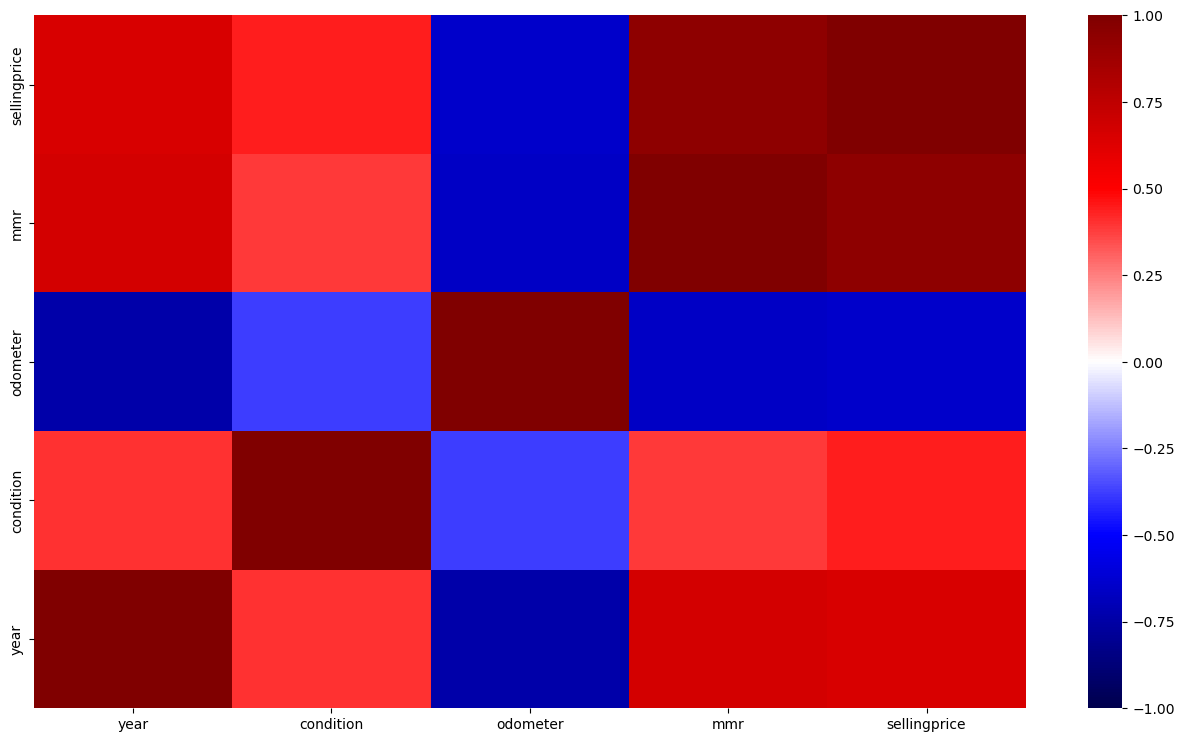

In [46]:
numeric_cols = df_updated.select_dtypes(include=['float', 'int','bool']).columns
corr_matrix = df_updated[numeric_cols].corr()

plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="seismic")
heatmap.set(xlim=(0, corr_matrix.shape[1]), ylim=(0, corr_matrix.shape[0]))
plt.gca().patch.set(hatch="x", edgecolor="#666")
plt.show()